In [1]:
import pandas as pd
import folium
import selenium
from IPython.display import Image

In [2]:
def convert_map_to_png(map, filename):
    """
    Method to convert a folium map to a png file by
    saving the map as an html file and then taking a
    screenshot of the html file on the browser.

    map : folium map object
        The map to be converted to a png file
    filename : str, does not include file type
    """
    import os
    import time
    from selenium import webdriver

    html_filename=f'{filename}.html'
    map.save(html_filename)

    tmpurl=f'file://{os.getcwd()}/{html_filename}'
    
    try:
        try:
            browser = webdriver.Firefox()
        except:
            browser = webdriver.Chrome()
    except:
        browser = webdriver.Safari()

    browser.get(tmpurl)
    time.sleep(5)
    browser.save_screenshot(f'{filename}.png')
    browser.quit()
    os.remove(html_filename)

    return Image(f'{filename}.png')

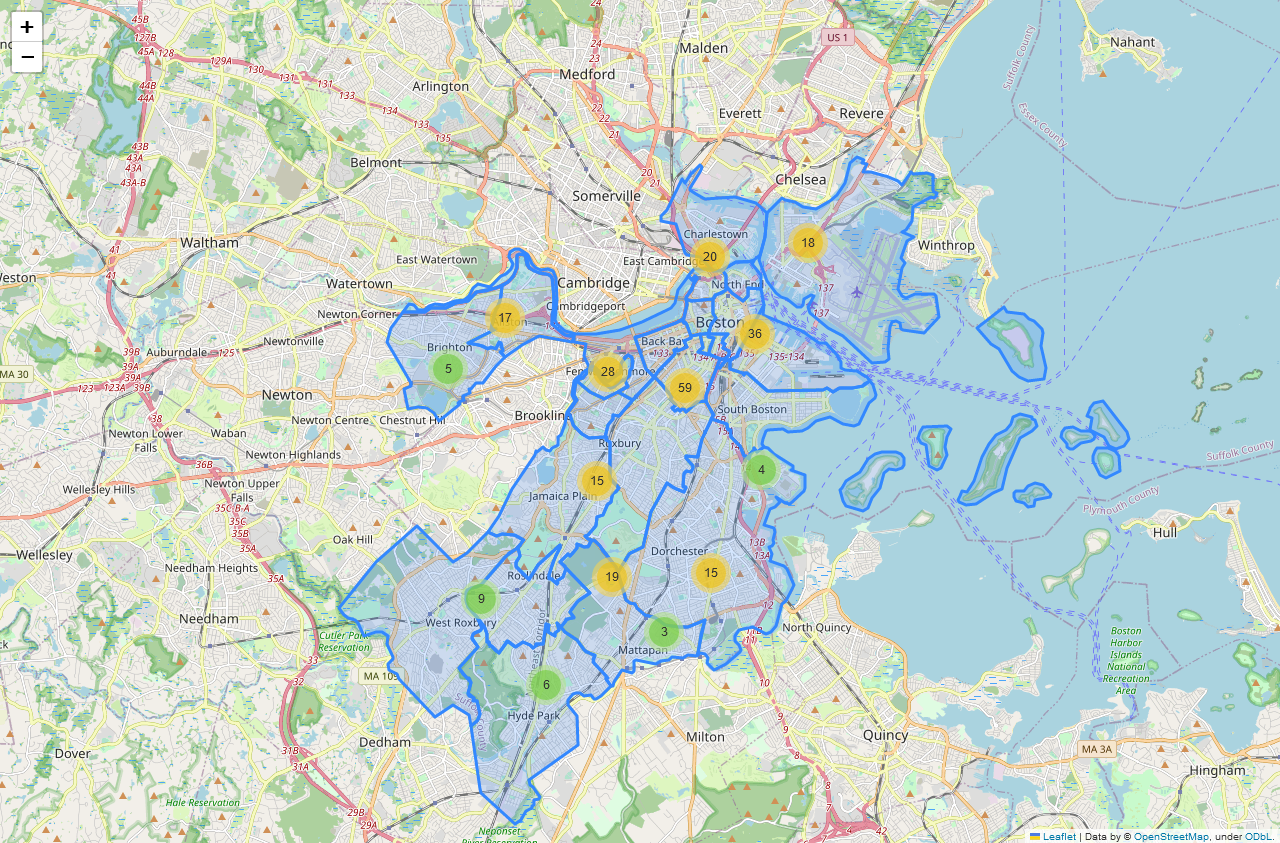

In [3]:
from folium.plugins import FastMarkerCluster

boston_map = folium.Map(location=[42.330377, -71.088132], zoom_start = 12.25)

layer_1 = folium.GeoJson(
    data=(open("data/Boston_Neighborhood_Boundaries_Approximated_by_2020_Census_Tracts.geojson", "r").read()),
    name="Neighborhoods")

layer_1.add_to(boston_map)

data = pd.read_csv("data/current_bluebikes_stations.csv", low_memory=False)
locations = data[data["District"] == "Boston"]
marker_cluster = FastMarkerCluster(data=locations.loc[:, ['Latitude', 'Longitude']], ).add_to(boston_map)

convert_map_to_png(boston_map, 'citymap')
Image('citymap.png')

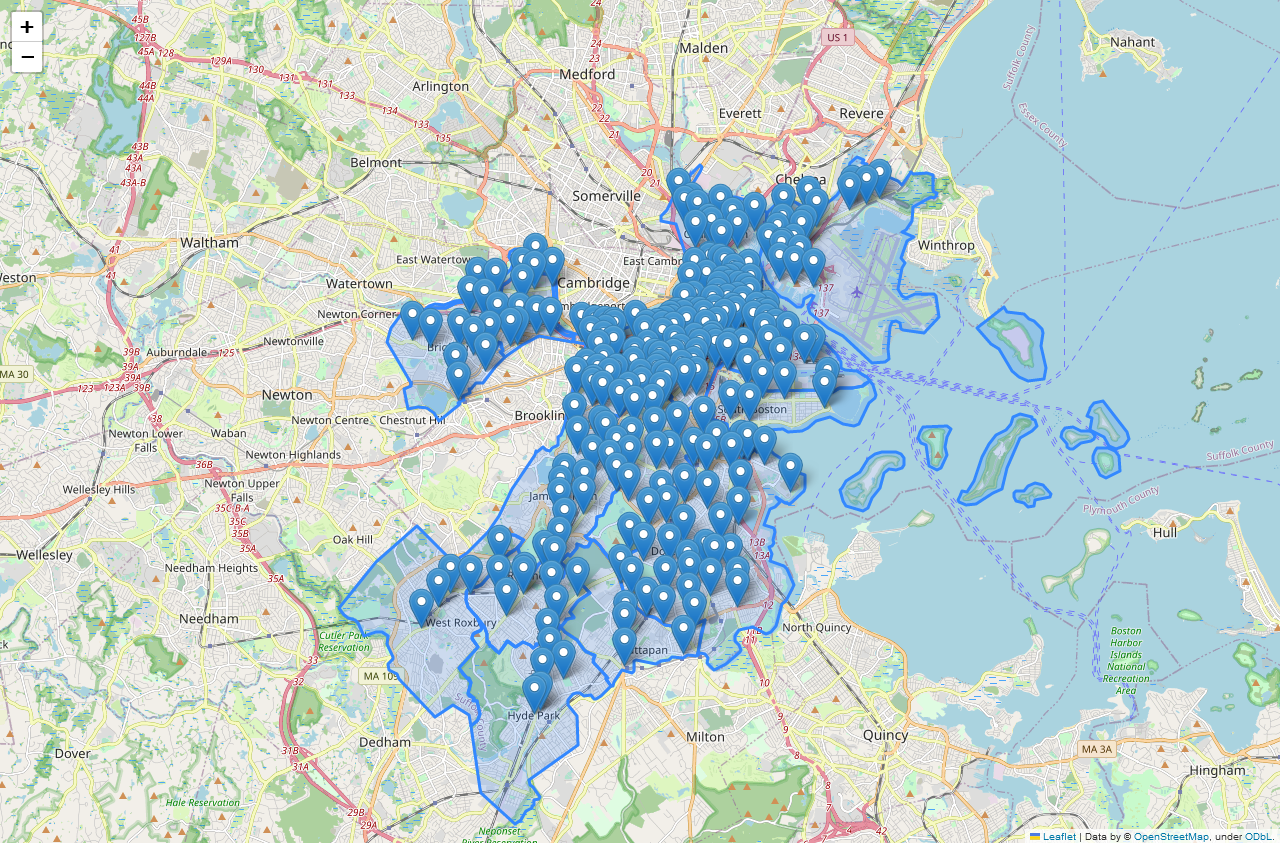

In [4]:
boston_map = folium.Map(location=[42.330377, -71.088132], zoom_start = 12.25)

layer_1 = folium.GeoJson(
    data=(open("data/Boston_Neighborhood_Boundaries_Approximated_by_2020_Census_Tracts.geojson", "r").read()),
    name="Neighborhoods")

layer_1.add_to(boston_map)

data = pd.read_csv("data/current_bluebikes_stations.csv", low_memory=False)
data = data[data["District"] == "Boston"]
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['Latitude'], data.iloc[i]['Longitude']],
   ).add_to(boston_map)

convert_map_to_png(boston_map, 'fullcitymap')
Image('fullcitymap.png')

In [5]:
import requests
import time

def in_city(row):
    time.sleep(1.1)
    lat = row['start station latitude']
    long = row['start station longitude']
    r = requests.get(f"https://nominatim.openstreetmap.org/reverse?format=jsonv2&lat={lat}&lon={long}")
    try:
        return r.json()["address"]["city"] == "Boston"
    except:
        return False

In [6]:
trip_data = pd.read_csv("data/202209-bluebikes-tripdata.csv", low_memory=False)

In [7]:
stations = trip_data[['start station id', 'start station latitude', 'start station longitude']]
stations = stations.drop_duplicates(subset=['start station id'])

In [8]:
rides = stations[stations.apply(in_city, axis=1)]

In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 59411
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start station id         249 non-null    int64  
 1   start station latitude   249 non-null    float64
 2   start station longitude  249 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.8 KB


In [10]:
def station_in_city(row):
    id = row["start station id"]
    return id in boston_ids

In [11]:
boston_ids = set(rides["start station id"].tolist())

In [12]:
start_stations = trip_data[trip_data.apply(station_in_city, axis=1)]

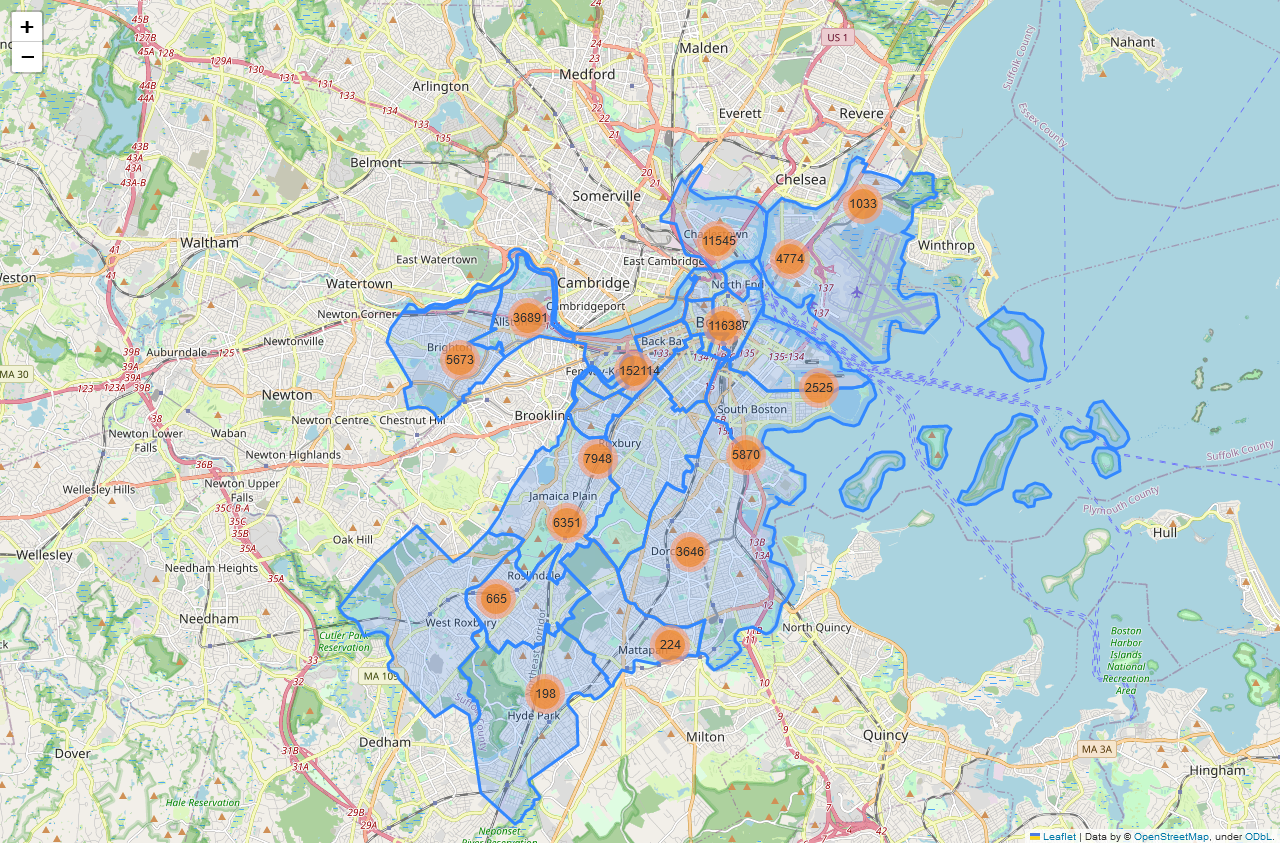

In [13]:
boston_map = folium.Map(location=[42.330377, -71.088132], zoom_start = 12.25)

layer_1 = folium.GeoJson(
    data=(open("data/Boston_Neighborhood_Boundaries_Approximated_by_2020_Census_Tracts.geojson", "r").read()),
    name="Neighborhoods")

layer_1.add_to(boston_map)

marker_cluster = FastMarkerCluster(data=start_stations.loc[:, ['start station latitude', 'start station longitude']], ).add_to(boston_map)

convert_map_to_png(boston_map, 'ridemap')
Image('ridemap.png')

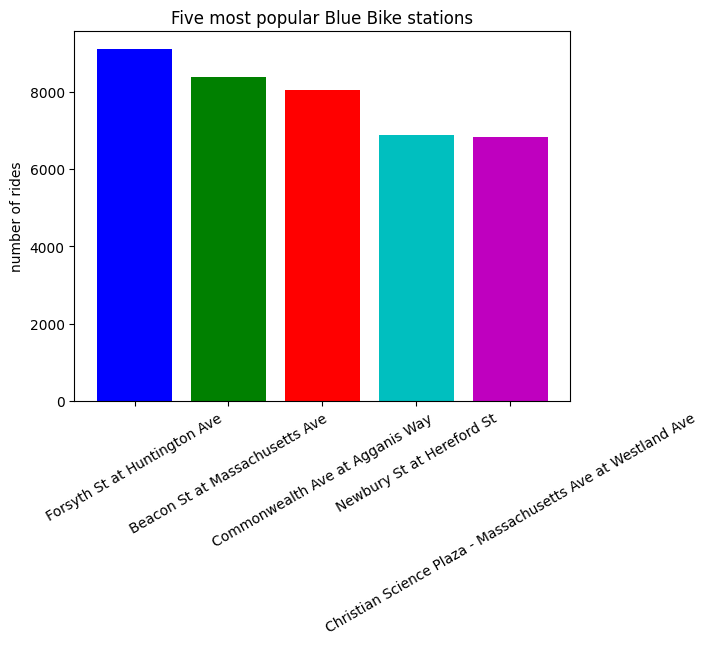

In [14]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

number_rides = pd.DataFrame(start_stations["start station name"].value_counts())
number_rides["station"] = number_rides.index
stations = number_rides["station"][:5]
counts = number_rides["count"][:5]
bar_labels = stations
bar_colors = [x for x in 'bgrcmyk']

ax.bar(stations, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("number of rides")
ax.set_title("Five most popular Blue Bike stations")
plt.xticks(rotation=30)

plt.savefig('popular.png')
plt.show()

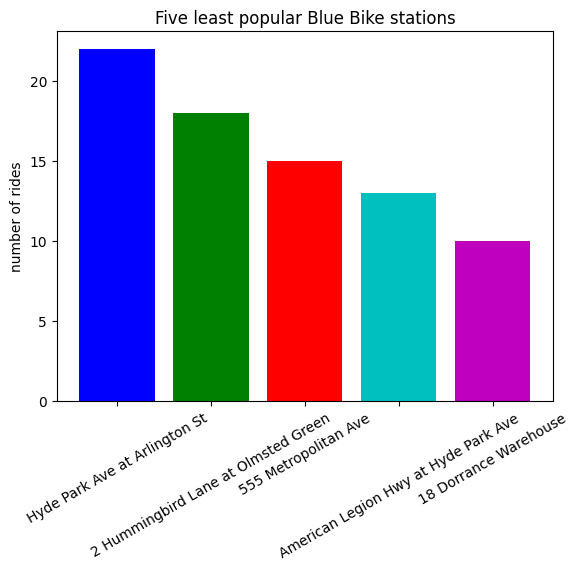

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

number_rides = pd.DataFrame(start_stations["start station name"].value_counts())
number_rides["station"] = number_rides.index
stations = number_rides["station"][-5:]
counts = number_rides["count"][-5:]
bar_labels = stations
bar_colors = [x for x in 'bgrcmyk']

ax.bar(stations, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("number of rides")
ax.set_title("Five least popular Blue Bike stations")
plt.xticks(rotation=30)

plt.savefig('unpopular.png')
plt.show()

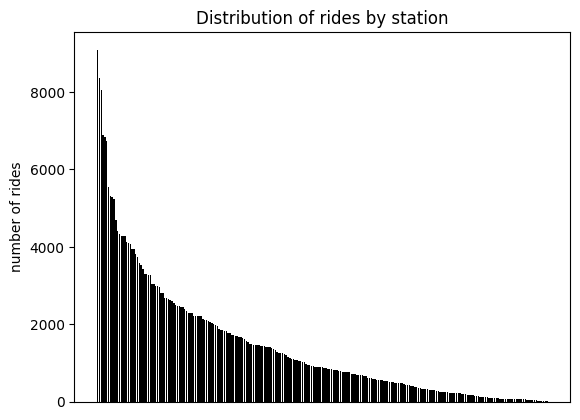

In [21]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

number_rides = pd.DataFrame(start_stations["start station name"].value_counts())
number_rides["station"] = number_rides.index
stations = number_rides["station"]
counts = number_rides["count"]
bar_labels = stations
bar_colors = ["black"]*len(stations) #[x for x in 'b']

ax.bar(stations, counts, color=bar_colors)

ax.get_xaxis().set_visible(False)
ax.set_ylabel("number of rides")
ax.set_title("Distribution of rides by station")

plt.savefig('totalrides.png')
plt.show()

In [41]:
import numpy as np

print(np.sort(trip_data["start station name"].unique()))
data[data["District"]=="Boston"]["Name"].unique()
# boston_stations = data[data["

['1200 Beacon St' '160 Arsenal' '175 N Harvard St' '18 Dorrance Warehouse'
 '191 Beacon St' '2 Hummingbird Lane at Olmsted Green' '30 Dane St'
 '359 Broadway - Broadway at Fayette Street' '555 Metropolitan Ave'
 '606 American Legion Hwy at Canterbury St' '645 Summer St'
 '699 Mt Auburn St' '7 Acre Park' '700 Commonwealth Ave.' '700 Huron Ave'
 '75 Binney St' '84 Cambridgepark Dr' '855 Broadway' '955 Mass Ave'
 'Adams St at Lonsdale St' 'Addison St at Saratoga St'
 'Airport T Stop - Bremen St at Brooks St' 'Albany St at E. Brookline St'
 'Alewife MBTA at Steel Place' 'Alewife Station at Russell Field'
 'American Legion Hwy at Cummins Hwy'
 'American Legion Hwy at Hyde Park Ave' 'Ames St at Broadway'
 'Ames St at Main St' 'Andrew T Stop - Dorchester Ave at Dexter St'
 'Aquarium T Stop - 200 Atlantic Ave' 'Arch St at Franklin St'
 'Archdale Rd at Washington St' 'Arsenal Yards' 'Ashmont T Stop'
 'Assembly Square T' 'Auburndale' 'B.U. Central - 725 Comm. Ave.'
 'BCBS Quincy' 'Back Bay T Sto

array(['175 N Harvard St', '2 Hummingbird Lane at Olmsted Green',
       '555 Metropolitan Ave', '606 American Legion Hwy at Canterbury St',
       '645 Summer St', '700 Commonwealth Ave.', 'Adams Branch Library',
       'Adams St at Lonsdale St', 'Addison St at Saratoga St',
       'Airport T Stop - Bremen St at Brooks St',
       'Albany St at E. Brookline St',
       'American Legion Hwy at Cummins Hwy',
       'American Legion Hwy at Hyde Park Ave',
       'Andrew T Stop - Dorchester Ave at Dexter St',
       'Aquarium T Stop - 200 Atlantic Ave', 'Arch St at Franklin St',
       'Archdale Rd at Washington St', 'Ashmont T Stop',
       'B.U. Central - 725 Comm. Ave.',
       'Back Bay T Stop - Dartmouth St at Stuart St',
       'Bartlett St at John Elliot Sq', 'Beach St at Freeport St',
       'Beacon St at Charles St', 'Beacon St at Massachusetts Ave',
       'Belgrade Ave at Walworth St', 'Bellevue T Stop',
       'Bennington St at Byron St', 'Bennington St at Constitution Beach',

In [42]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601049 entries, 0 to 601048
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             601049 non-null  int64  
 1   starttime                601049 non-null  object 
 2   stoptime                 601049 non-null  object 
 3   start station id         601049 non-null  int64  
 4   start station name       601049 non-null  object 
 5   start station latitude   601049 non-null  float64
 6   start station longitude  601049 non-null  float64
 7   end station id           601049 non-null  int64  
 8   end station name         601049 non-null  object 
 9   end station latitude     601049 non-null  float64
 10  end station longitude    601049 non-null  float64
 11  bikeid                   601049 non-null  int64  
 12  usertype                 601049 non-null  object 
 13  postal code              474198 non-null  object 
dtypes: f

In [66]:
def neighbourhood(row):
    time.sleep(1.1)
    lat = row['start station latitude']
    long = row['start station longitude']
    r = requests.get(f"https://nominatim.openstreetmap.org/reverse?format=jsonv2&lat={lat}&lon={long}")
    try:
        return r.json()["address"]["neighbourhood"]
    except:
        return np.NaN

In [117]:
# new = stations[stations.apply(neighbourhood, axis=1)]
# new
stations = trip_data[['start station id', 'start station latitude', 'start station longitude']]
stations = stations.drop_duplicates(subset=['start station id'])
stations["Neighbourhood"] = stations.apply(neighbourhood, axis=1)

In [118]:
stations = stations.dropna()

In [119]:
neighbourhoods = stations.drop_duplicates(subset="Neighbourhood")

In [120]:
neighbourhoods["in city"] = neighbourhoods.apply(in_city, axis=1)

C:\Users\pjbro\AppData\Local\Temp\ipykernel_26796\1117028261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhoods["in city"] = neighbourhoods.apply(in_city, axis=1)


In [121]:
neighbourhoods = neighbourhoods[neighbourhoods["in city"]]
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 59411
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start station id         44 non-null     int64  
 1   start station latitude   44 non-null     float64
 2   start station longitude  44 non-null     float64
 3   Neighbourhood            44 non-null     object 
 4   in city                  44 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [122]:
city_spots = neighbourhoods[neighbourhoods["in city"] == True]["Neighbourhood"].tolist()
def filter_by_city(row):
    return row["Neighbourhood"] in city_spots

In [123]:
stations["in city"]=stations.apply(filter_by_city, axis=1)

In [124]:
stations = stations[stations["in city"] == True]

ValueError: number of labels (5) does not match number of bars (117).

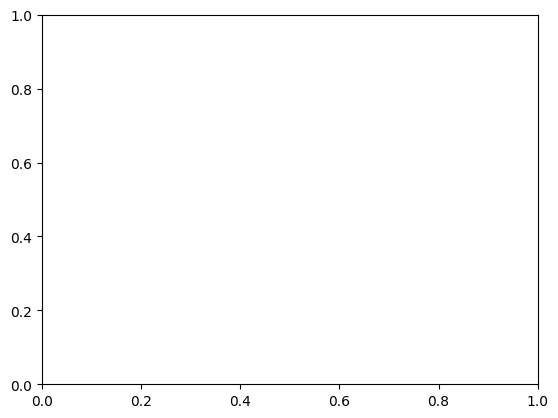

In [125]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

station_locations = pd.DataFrame(stations["Neighbourhood"].value_counts())
station_locations["neighbourhood"] = station_locations.index
station_data = station_locations["neighbourhood"][:5]
counts = station_locations["count"][:5]
bar_labels = station_data
bar_colors = [x for x in 'bgrcmyk']

ax.bar(stations, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("number of rides")
ax.set_title("Five neighbourhoods with the most Blue Bikes stations")
plt.xticks(rotation=30)

plt.savefig('neighbourhood.png')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

station_locations = pd.DataFrame(stations["Neighbourhood"].value_counts())
station_locations["neighbourhood"] = station_locations.index
station_data = station_locations["neighbourhood"][-5:]
counts = station_locations["count"][-5:]
bar_labels = station_data
bar_colors = [x for x in 'bgrcmyk']

ax.bar(stations, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("number of rides")
ax.set_title("Five neighbourhoods with the least Blue Bikes stations")
plt.xticks(rotation=30)

plt.savefig('leastneighbourhood.png')
plt.show()